In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [120]:
passengers_data = pd.read_csv("./data/train.csv")

# Context

Прежде всего следует сказать, что за данные мы рассматриваем. Хочется заметить, что этот датасет искусственно сгенерирован на основе информации о пассажирах Титаника (на Kaggle написано). Хотелось бы это как-то доказать и увидеть, по чем это можно увидеть и можно ли вообще.

Теперь продумаем, что в первую очередь нужно бы сделать:
1. Посмотреть на размер наших данных и на их содержание в целом
2. Понять, за что отвечает каждый признак
3. Проанализировать качество данных (убедиться, что наблюдение это строка, каждая характеристика это столбец, посмотреть количество пропущенных данных)
4. Подробнее посмотреть на тип каждой характеристики (числовая, категориальная (порядковая или нет), бинарная) и на их тип данных
5. Совершить некоторые преобразования для дальнейшей работы (решить, что делать с пропущенными значениями и возможно преобразовать некоторые признаки)
6. Сделать предположения о влиянии признаков на целевой признак
7. Изучить распределения различных признаков по отдельности
8. Изучить распределение различных признаков в зависимости от целевого признака
9. Изучить взаимодействие признаков
10. Есть желание использовать t-SNE. Интересно, возможно ли получить хорошое двумерное представление данных

Начнем. Посмотрим на наши данные

In [121]:
passengers_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


Опишем признаки:
1. PassengerId - просто индекс пассажира. Его вполне можно либо опустить, либо заменить им index
2. Survived - показатель того, что пассажир выжил. Целевой признак, бинарный (0 - не выжил, 1 - выжил)
3. Pclass - класс билета. Категориальный, выраженный в числовом виде (1 - первый класс, 2 - второй класс, 3 - третий класс)
4. Name - полное имя пассажира. В дальнейшем возможно лучше преобразовать этот признак к двум (имя и фамилия)
5. Sex - пол пассажира. Категориальный (или бинарный) (male - мужчина, female - женщина)
6. Age - возраст. Числовой, тип с плавающей точкой (так как есть дети меньше одного года)
7. SibSp - количество родственников (братья, сестры, муж, жена) на борту. Числовой, целый
8. Rarch - количество родственников (мать, отец, дети) на борту. Числовой, целый
9. Ticket - номер билета. Категориальный
10. Fare - пассажирский тариф (или, как я понял, сколько заплатили за билет). Числовой, с плавающей точкой
11. Cabin - номер кабины. Категориальный
12. Embarked - порт погрузки. Категориальный (C = Cherbourg, Q = Queenstown, S = Southampton)

In [122]:
passengers_data.shape

(100000, 12)

Таким образом, в нашем датасете ровно 100000 пассажиров (что уже немного намекает на искусственность данных) ) и 12 признаков. Стоит заметить, что признак PassengerId по сути избыточен и я его опущу (оставлю просто индекс). Таким образом осталось 11 признаков

In [123]:
passengers_data.drop(labels=["PassengerId"], axis=1, inplace=True)
passengers_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [124]:
passengers_data["Surname"] = passengers_data["Name"].str.split(", ", expand=True)[1]
passengers_data["Name"] = passengers_data["Name"].str.split(", ", expand=True)[0]

In [125]:
passengers_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Surname'],
      dtype='object')

In [126]:
passengers_data = passengers_data.reindex(columns=['Survived', 'Pclass', 'Name', 'Surname', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'])
passengers_data.head()

,Survived,Pclass,Name,Surname,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,Oconnor,Frankie,male,NaN,2,0,209245,27.14,C12239,S
1,0,3,Bryan,Drew,male,NaN,0,0,27323,13.35,NaN,S
2,0,3,Owens,Kenneth,male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,Kramer,James,male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,Bond,Michael,male,25.00,0,0,427635,7.76,NaN,S


Здесь мы разделили имя и фамилию пассажира для дальнейшего анализа (возможно это будет удобно). Таким образом, признков снова условно 12

Разделим наши признаки на категориальные и числовые

In [127]:
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
categoric_features = ["Survived", "Pclass", "Sex", "Embarked"]

# Data quality assessment

Теперь проведем анализ качества данных

In [128]:
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Surname   100000 non-null  object 
 4   Sex       100000 non-null  object 
 5   Age       96708 non-null   float64
 6   SibSp     100000 non-null  int64  
 7   Parch     100000 non-null  int64  
 8   Ticket    95377 non-null   object 
 9   Fare      99866 non-null   float64
 10  Cabin     32134 non-null   object 
 11  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 9.2+ MB


Сразу заметим, что большая часть данных о номере кабины (Cabin) пропущена - NaN'ы составляют порядка 70%. Этот признак не даст нам много информации. Я склоняюсь к тому, что его вообще можно опустить. По правде говоря, я не думаю, что и признак Ticket что-то даст. От него может зависеть только класс билета, но у нас он выделен в отдельный признак, а значит много информации номер билета тоже не даст. Я оставлю эти признаки, но подробно их рассматривать не буду.

In [129]:
passengers_data.isna().sum()

Survived        0
Pclass          0
Name            0
Surname         0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Выше приведено количество пропущенных значений для каждого признака. Все же думаю, что определяющими признаками среди тех, у которых есть пропущенные значения, являются Age, Fare и Embarked. Так что те строки, в которых эти значения пропущены я опущу

In [130]:
passengers_data.dropna(subset=["Age", "Fare", "Embarked"], inplace=True)

In [131]:
passengers_data.shape

(96332, 12)

Таким образом осталось порядка 96 тысяч записей

In [132]:
passengers_data.isna().sum()

Survived        0
Pclass          0
Name            0
Surname         0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket       4452
Fare            0
Cabin       65371
Embarked        0
dtype: int64

А пропущенные значения остались только в по сути беcполезных признаках

In [133]:
passengers_data.sample(5)

,Survived,Pclass,Name,Surname,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31985,1,3,Westphalen,Sean,male,19.0,0,0,A. 432606,11.23,NaN,S
6623,0,1,Clos,Katie,female,51.0,3,2,26652,14.49,B12443,C
95064,0,3,Walker,Gregory,male,35.0,0,0,NaN,3.09,NaN,S
33938,0,2,Holmes,Jeff,male,58.0,0,0,W./C. 229587,25.24,NaN,S
89819,1,1,Punches,Lucia,female,34.0,1,2,208696,36.97,D21027,C


In [134]:
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96332 entries, 2 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  96332 non-null  int64  
 1   Pclass    96332 non-null  int64  
 2   Name      96332 non-null  object 
 3   Surname   96332 non-null  object 
 4   Sex       96332 non-null  object 
 5   Age       96332 non-null  float64
 6   SibSp     96332 non-null  int64  
 7   Parch     96332 non-null  int64  
 8   Ticket    91880 non-null  object 
 9   Fare      96332 non-null  float64
 10  Cabin     30961 non-null  object 
 11  Embarked  96332 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 9.6+ MB


Здесь можно сделать маленький вывод. Выше мы просмотрели наши данные, выяснили, за что отвечает каждый признак и его тип данных, провели некоторые преобразования, посмотрели количество пропущенных значений, определили потенциальные важные признаки и по ним избавились от пропущенных данных. Каждая запись отвечает за пассажира, каждая колонка - за отдельный признак. Без учета признаков Ticket и Cabin наши данные без пропусков

Сейчас просмотрим некоторые статистики для числовых признаков и значения для категориальных для первичной оценки их качества

In [135]:
passengers_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,96332.000000,96332.000000,96332.000000,96332.000000,96332.000000,96332.000000
mean,0.428092,2.106392,38.352635,0.398455,0.455082,43.923143
std,0.494805,0.837831,18.314608,0.864654,0.952182,69.523747
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.030000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.480000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.520000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


Заметим, что у признаков SibSp, Parch и Fare максимальные значения заметно выбиваются из общего распределения. Это нельзя оценить как плохое качество данных, но в дальнейшем это может помешать 

In [136]:
passengers_data["Survived"].value_counts()

0    55093
1    41239
Name: Survived, dtype: int64

Здесь можем сказать, что целевая переменная распределена примерно равномерно. Это только плюс к качеству

In [137]:
passengers_data["Pclass"].value_counts()

3    39480
1    29231
2    27621
Name: Pclass, dtype: int64

Здесь выражено преобладание пассажиров третьего класса, но не критично для качества данных 

In [138]:
passengers_data["Sex"].value_counts()

male      54016
female    42316
Name: Sex, dtype: int64

Мужчин больше, чем женщин, но опять же не критично

In [139]:
passengers_data["Embarked"].value_counts()

S    69676
C    21427
Q     5229
Name: Embarked, dtype: int64

Здесь заметно явное преобладание количества пассажиров, которые погрузились в порту Southampton. Посмотрим в дальнейшем на влияние этого

Проведенное выше исследование показывает, что данные качественные. Можем приступать к следующему пункту.
*Я вполне допускаю, что анализ выше не является полным для выяснения качества данных. Дальнейший анализ может выявить проблемы*

# Data exploration

Сделаем несколько предположений:
1. Вполне возможно, признак Survived зависит от Age, Sex, Pclass (в силу разного расположения кают), SibSp и Parch и возможно от Embarked
2. Скорее всего, признак Fare коррелирует с Pclass (хотя немного неправильно говорить о корреляции числового и категориального признака)
В дальнейшем мы их проверим

Начнем с исследования признаков по отдельности

## Категориальные признаки

In [140]:
categoric_features

['Survived', 'Pclass', 'Sex', 'Embarked']

### Survived

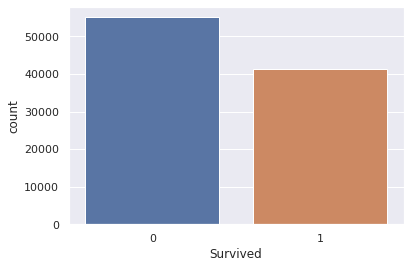

In [141]:
sns.countplot(x=passengers_data["Survived"]);

Все же число выживших меньше, хотя и не критично

### Pclass

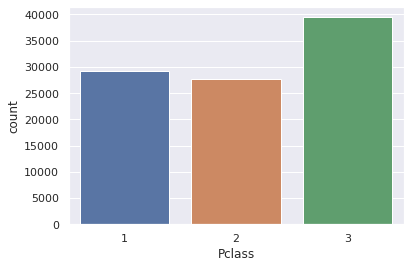

In [142]:
sns.countplot(x=passengers_data["Pclass"]);

Количество пассажиров третьего класса больше, чем первого и второго. Превого и второго примерно одинаково

### Sex

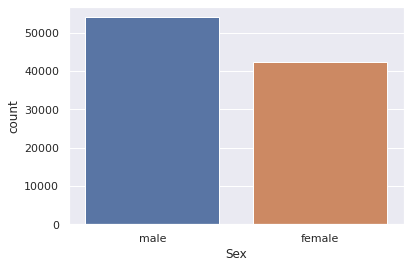

In [143]:
sns.countplot(x=passengers_data["Sex"]);

Как мы уже замечали, мужчин больше, чем женщин, но не критично

### Embarked

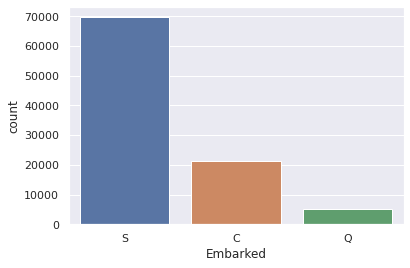

In [144]:
sns.countplot(x=passengers_data["Embarked"]);

Здесь распределение далеко не равномерное с явным преобладанием порта Southampton. Дальнейший анализ покажет влияние этого

## Числовые признаки

In [145]:
numeric_features

['Age', 'SibSp', 'Parch', 'Fare']

### Age

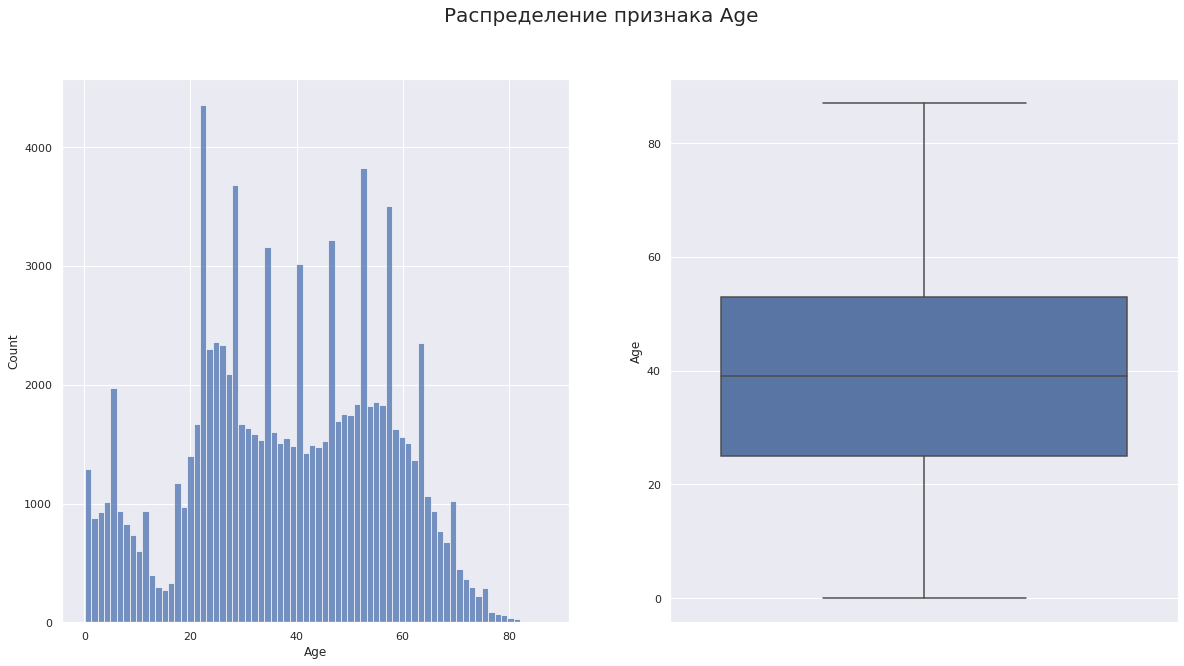

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Age', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data, x="Age");
sns.boxplot(ax=axes[1], data=passengers_data, y="Age");

In [147]:
passengers_data["Age"].describe()

count    96332.000000
mean        38.352635
std         18.314608
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

Основные статистики найдены выше. Медиана и среднее примерно равны. Распределение не близко к нормальному. Не является унимодальным, скоре бимодальное, но есть неярко выраженный третий пик на малых значениях. На гистограмме присутствуют характерные "выбросы", на боксплоте выбросов не обнаружено

### SibSp

In [148]:
passengers_data["SibSp"].value_counts()

0    70591
1    19044
2     3582
3     1577
4     1121
8      292
5      125
Name: SibSp, dtype: int64

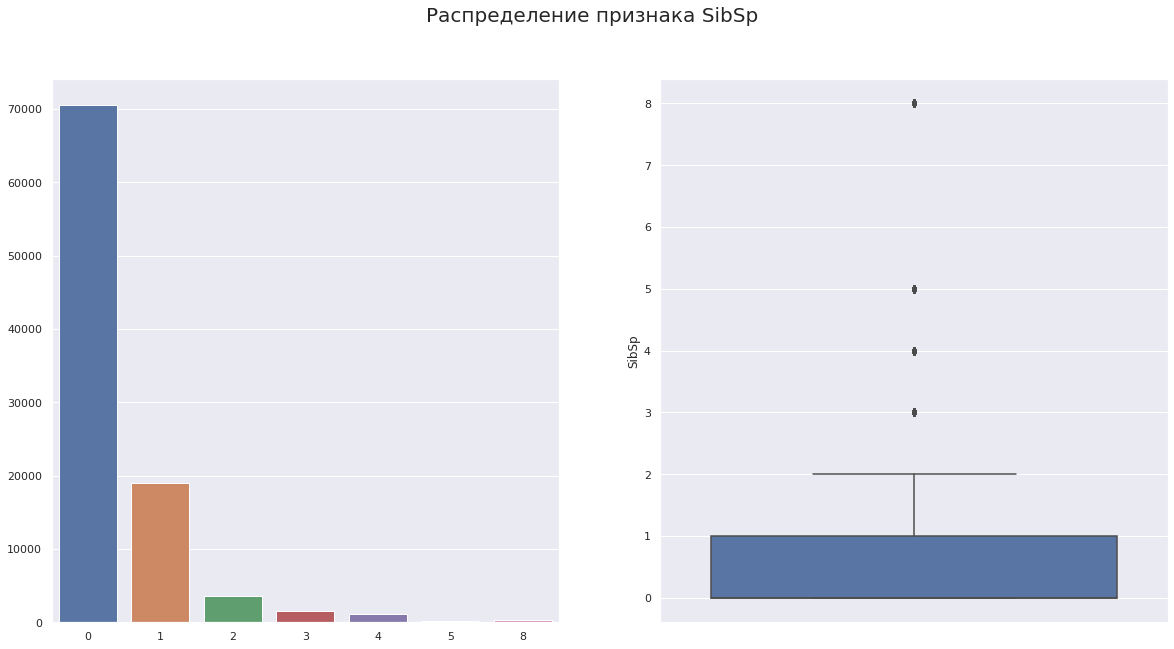

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака SibSp', fontsize=20)

sns.barplot(ax=axes[0], y=passengers_data["SibSp"].value_counts().values, 
            x=passengers_data["SibSp"].value_counts().index);
sns.boxplot(ax=axes[1], data=passengers_data, y="SibSp");

In [150]:
passengers_data["SibSp"].describe()

count    96332.000000
mean         0.398455
std          0.864654
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: SibSp, dtype: float64

Признак, несмотря на малое количество уникальных значений, числовой. Для удобство использовалась другая "гистограмма". Можем заметить, что количество значений 0 намного превосходит количество других значений. Значения 5, 8 (а в количественном соотвношении и 3, 4) вообще можно считать выбросами. На боксплоте это видно. Оставлю эти значения для дальнейшего анализа

### Parch

In [151]:
passengers_data["Parch"].value_counts()

0    70854
1    12482
2    10845
3      944
4      430
5      321
9      258
6      198
Name: Parch, dtype: int64

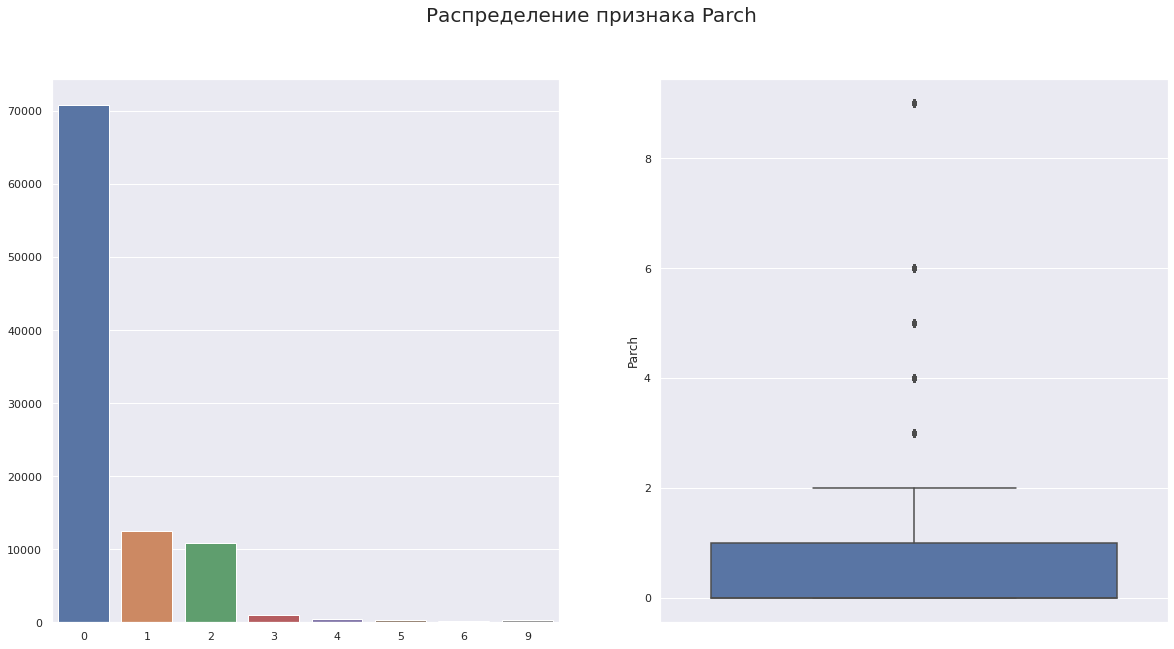

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Parch', fontsize=20)

sns.barplot(ax=axes[0], y=passengers_data["Parch"].value_counts().values, 
            x=passengers_data["Parch"].value_counts().index);
sns.boxplot(ax=axes[1], data=passengers_data, y="Parch");

In [153]:
passengers_data["Parch"].describe()

count    96332.000000
mean         0.455082
std          0.952182
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: Parch, dtype: float64

Ситуация примерно та же, что и с предыдущим признаком. Он также имеет не много уникальных значений, распределен неравномерно и количество значений 0 явно намного больше остальных. Значения 3, 4, 5, 6, 9 можно считать выбросами

### Fare

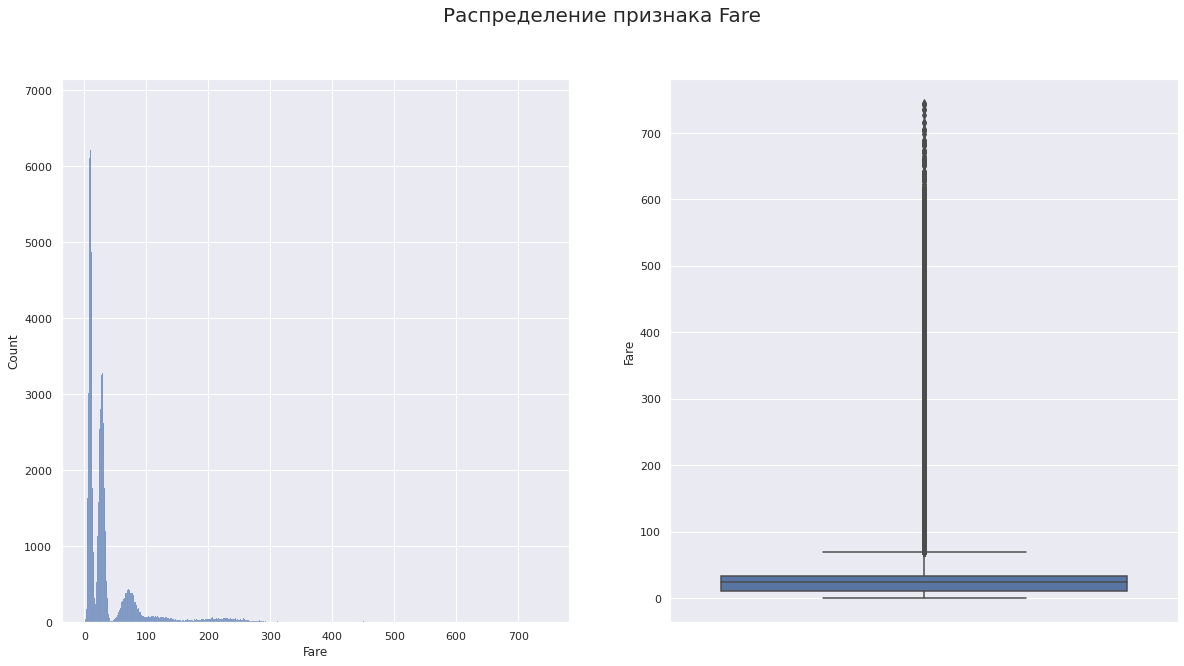

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Fare', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data, x="Fare");
sns.boxplot(ax=axes[1], data=passengers_data, y="Fare");

Картинка немного пугает. Давайте посмотрим статистики

In [155]:
passengers_data["Fare"].describe()

count    96332.000000
mean        43.923143
std         69.523747
min          0.680000
25%         10.030000
50%         24.480000
75%         33.520000
max        744.660000
Name: Fare, dtype: float64

И по статистикам, и по визуализации, распределение не близко к нормальному, смещено, имеет три пика

Рассмотрим отдельно часть данных без выбросов и сами выбросы. Для этого найдем интерквартильное расстояние и "максимум", а далее по нему произведем отсев

In [156]:
inq_range = passengers_data["Fare"].quantile(q=0.75) - passengers_data["Fare"].quantile(q=0.25)
max_fare = passengers_data["Fare"].median() + 3 * inq_range / 2
max_fare

59.715

In [157]:
passengers_data_without_outliers = passengers_data[passengers_data["Fare"] <= max_fare]
passengers_data_outliers = passengers_data[passengers_data["Fare"] > max_fare]

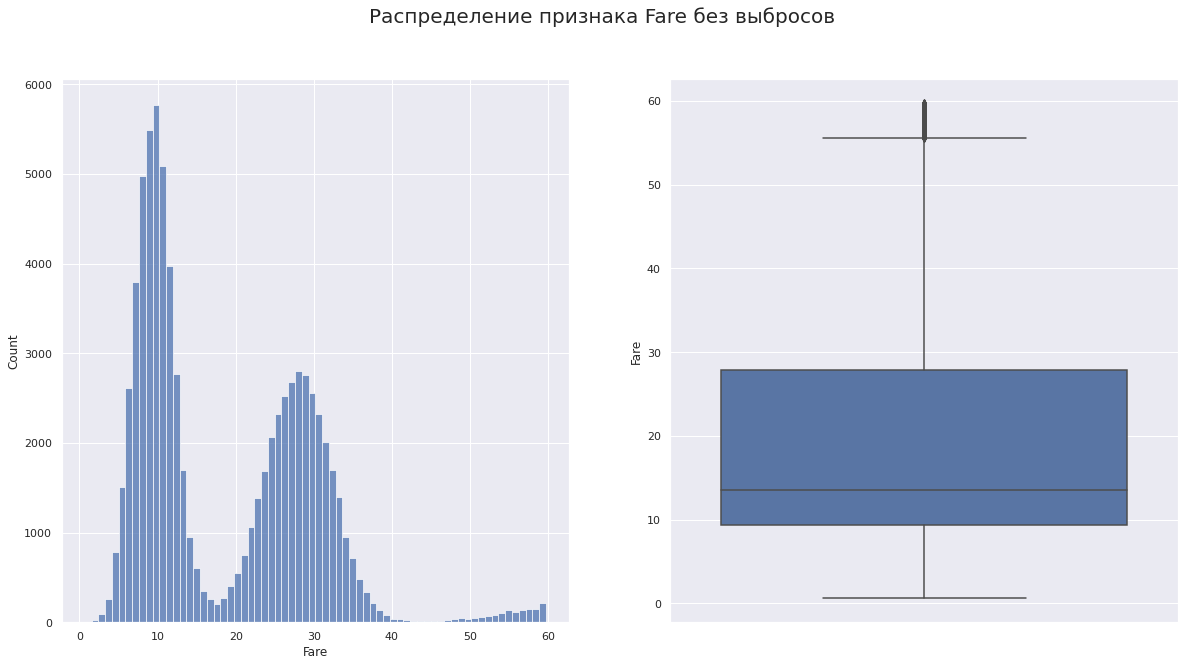

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Fare без выбросов', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data_without_outliers, x="Fare");
sns.boxplot(ax=axes[1], data=passengers_data_without_outliers, y="Fare");

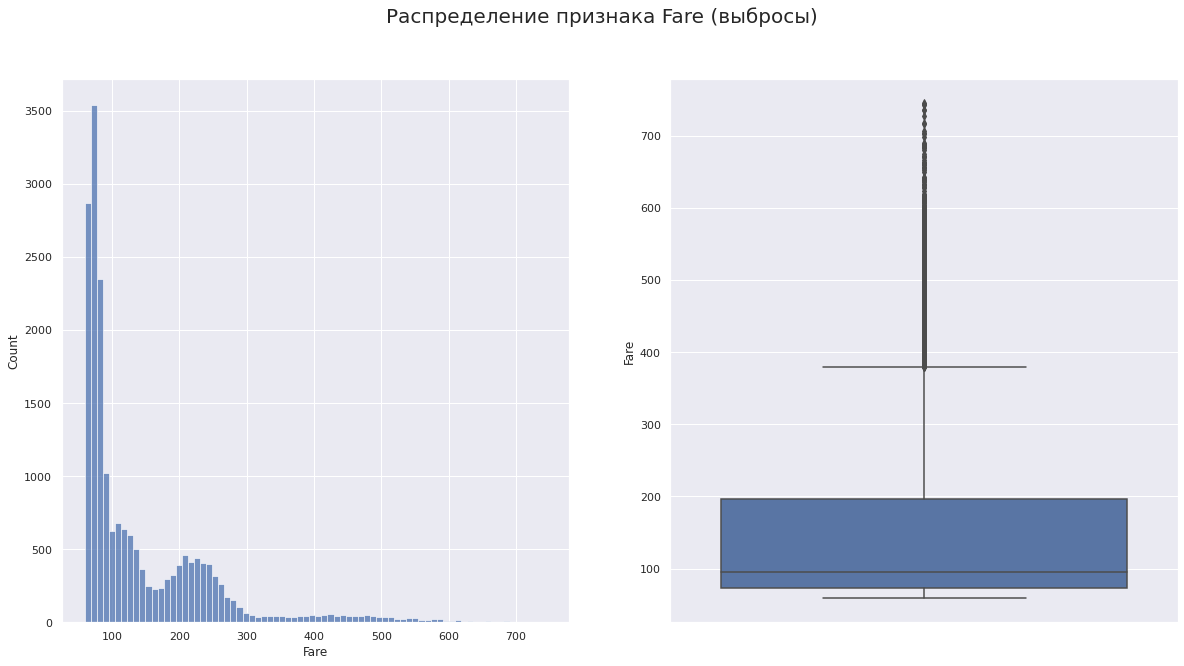

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Fare (выбросы)', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data_outliers, x="Fare");
sns.boxplot(ax=axes[1], data=passengers_data_outliers, y="Fare");

Картинка стала немного информативнее. Попробуем взять пик из последнего графика и довавить в первый. Для этого изначальные данные отбросим по Fare меньше значения 100

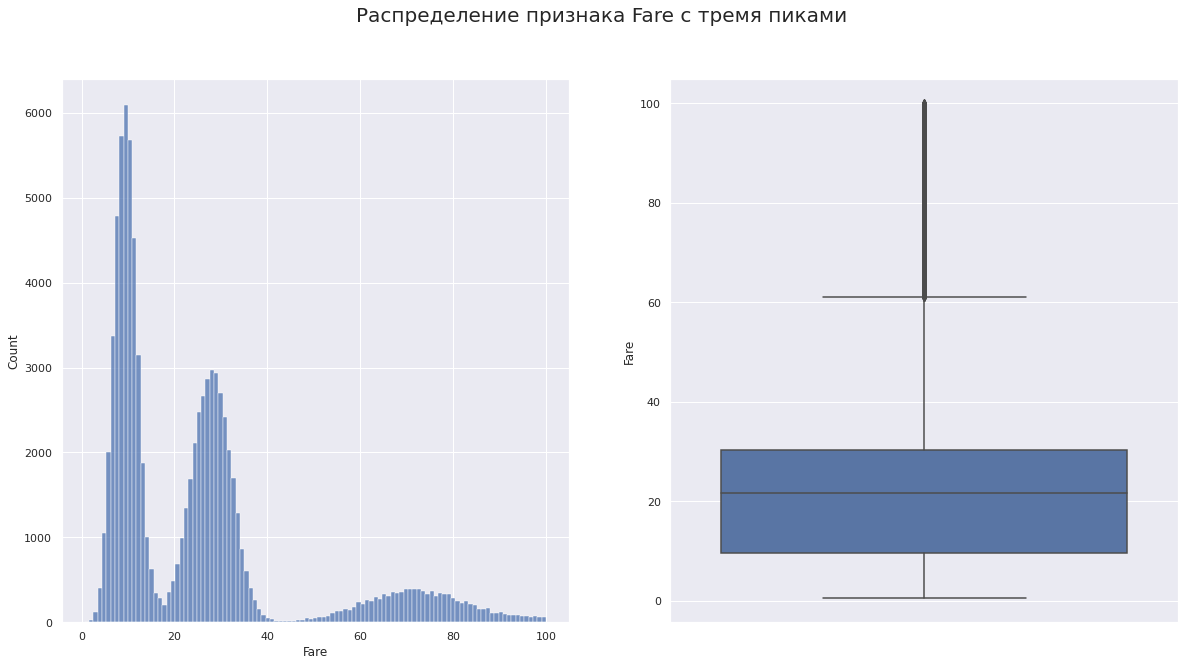

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Fare c тремя пиками', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data[passengers_data["Fare"] < 100], x="Fare");
sns.boxplot(ax=axes[1], data=passengers_data[passengers_data["Fare"] < 100], y="Fare");

Если посмотреть на распределение признака Emberked, то эти пики имеют примерно тот же вид. Вполне возможно, Embarked и Fare связаны (или как минимум коррелируют). Также можно заметить, что каждая "группа" по распределению похожа на нормальное распределение

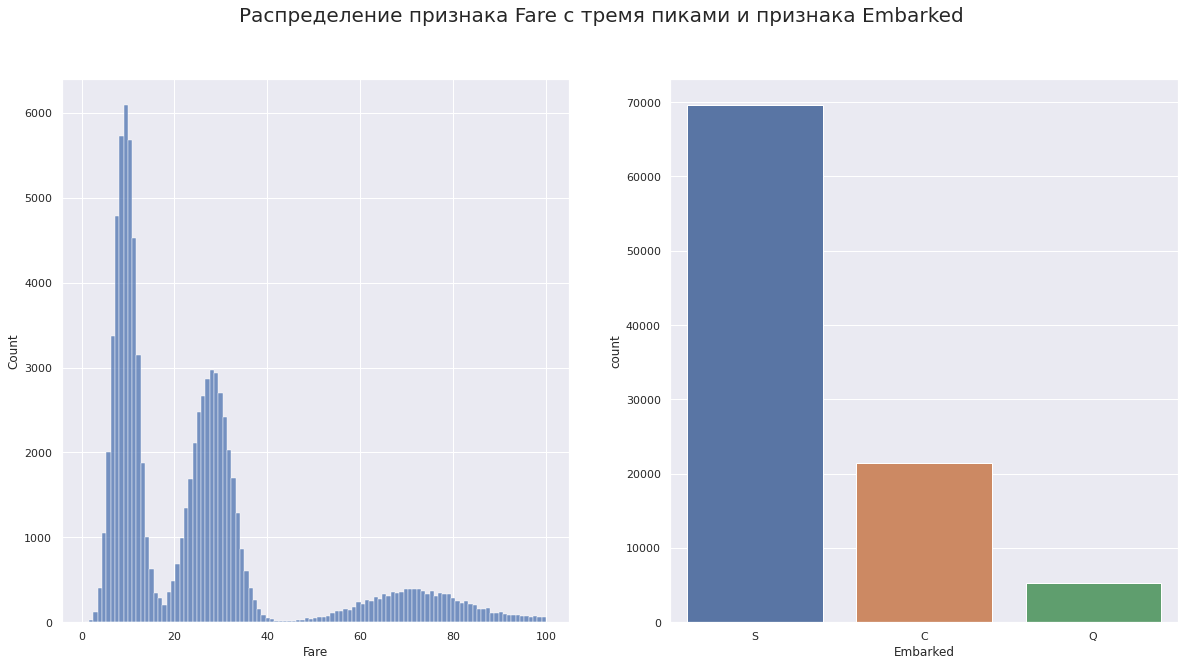

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Fare c тремя пиками и признака Embarked', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data[passengers_data["Fare"] < 100], x="Fare");
sns.countplot(ax=axes[1], x=passengers_data["Embarked"]);

Проверим эту связь далее, а пока можно констатировать такое интересное наблюдение

## Взаимодействие с целевым признаком

In [162]:
passengers_data.columns

Index(['Survived', 'Pclass', 'Name', 'Surname', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Pclass

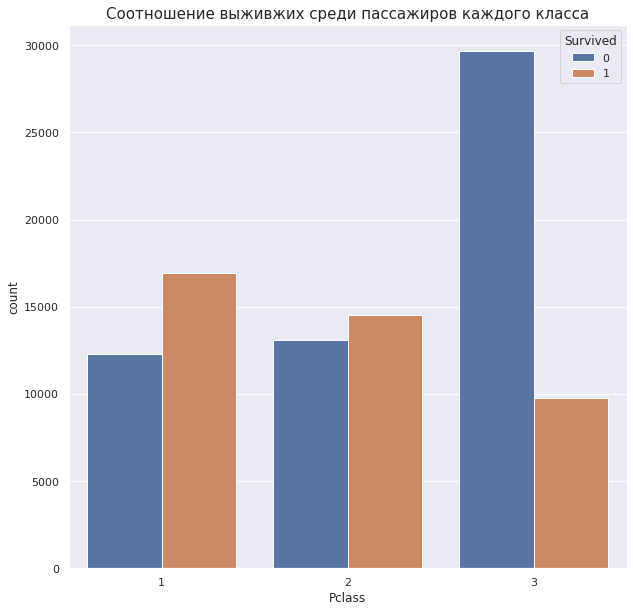

In [163]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Pclass", hue="Survived", data=passengers_data);
plt.title("Соотношение выживжих среди пассажиров каждого класса", {"fontsize": 15});

Предположение подтвердилось: среди пассажиров первого и второго класса в процентном (и в абсолютном) отношении выживших больше, чем среди пассажиров третьего класса. Это объясняется тем, что каюты пассажиров третьего класса находятся на нижних палубах, и им банально тяжелее в случае чего выбраться. Также немного больше выживших среди пассажиров первого класса в сравнении с пассажирами первого класса. По той же причине

### Sex

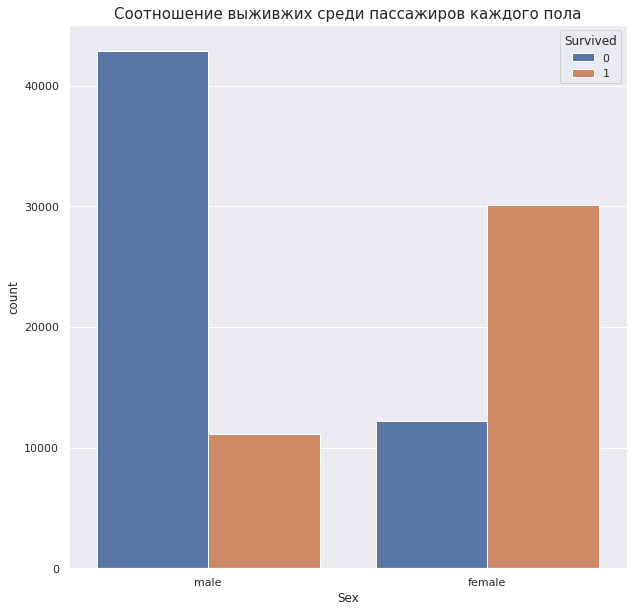

In [164]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Sex", hue="Survived", data=passengers_data);

plt.title("Соотношение выживжих среди пассажиров каждого пола", {"fontsize": 15});

Еще одно интересное наблюдение. Среди выживших больше женщин,чем мужчин. Объяснять это я не берусь

### Embarked

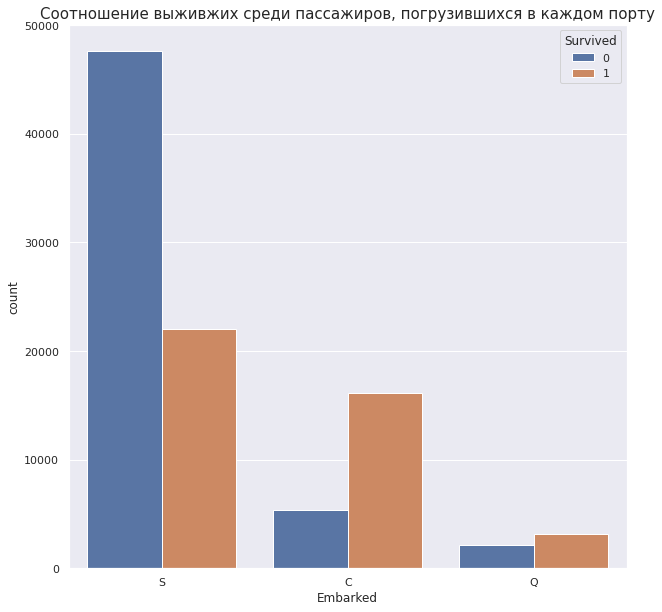

In [165]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Embarked", hue="Survived", data=passengers_data);
plt.title("Соотношение выживжих среди пассажиров, погрузившихся в каждом порту", {"fontsize": 15});

Среди погрузившихся в порту Southampton выживших меньше. Интресное наблюдение. Возможно, это так же связано с третьим классом. Возможно, пассажиры третьего класса преимущественно грузились в порту Southampton и с этим связан процент выживаемости при посадке в нем

### Age

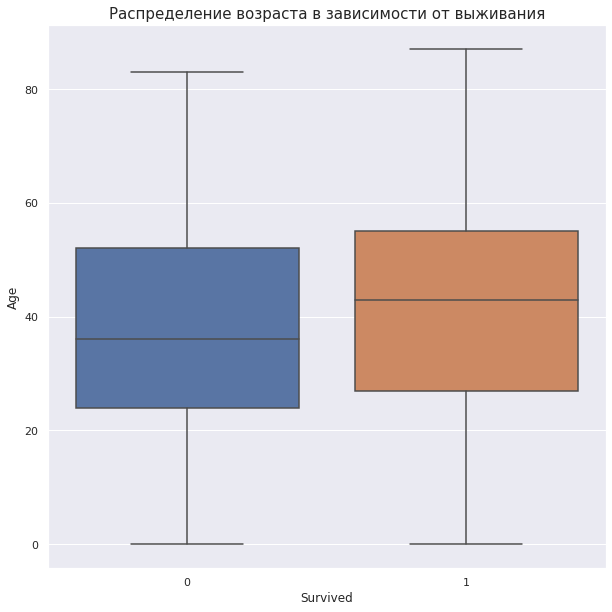

In [166]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="Survived", y="Age", data=passengers_data);
plt.title("Распределение возраста в зависимости от выживания", {"fontsize": 15});

По крайней мере по этой иллюстрации, средний возраст выживших немного больше среднего возраста погибших. Это опять же может быть связано с признаком Pclass (возможно более взрослые смогли позволить себе билет более высокого класса, и поэтому чаще выживали)

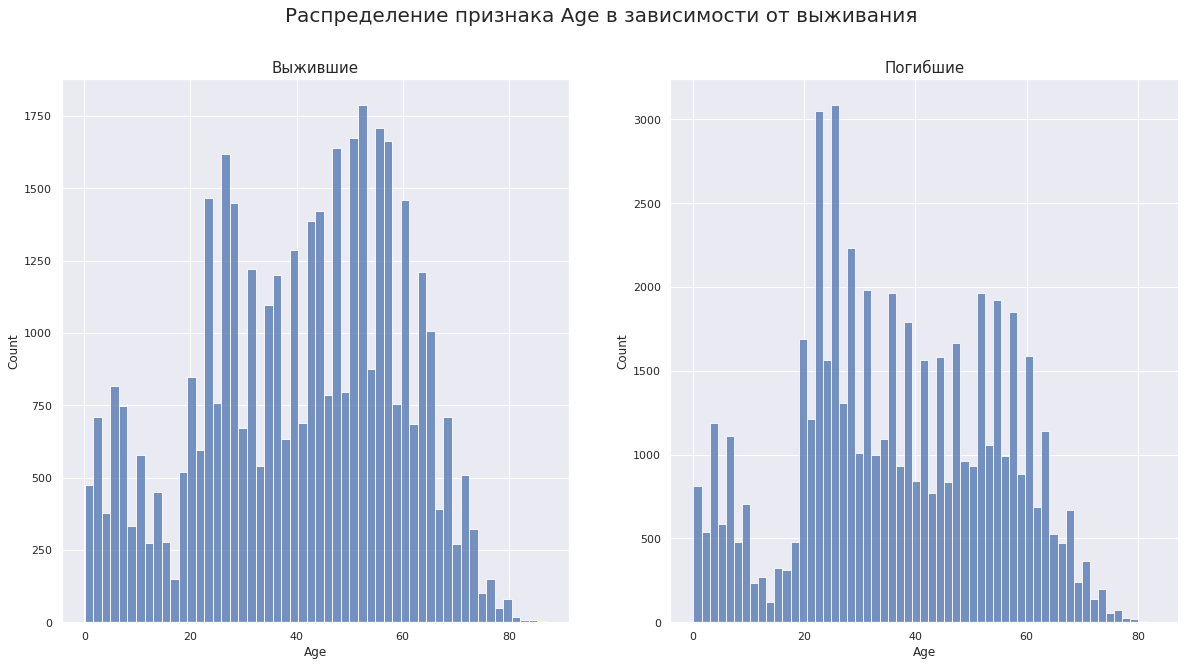

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Age в зависимости от выживания', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data[passengers_data["Survived"] == 1], x="Age");
axes[0].set_title("Выжившие",{"fontsize": 15});
sns.histplot(ax=axes[1], data=passengers_data[passengers_data["Survived"] == 0], x="Age");
axes[1].set_title("Погибшие",{"fontsize": 15});

Распределение изменилось не сильно, но один пик сместился в сторону большего возраста (Выжившие), в графике справа наоборот - в сторону меньшего (Погибшие)

### SibSp

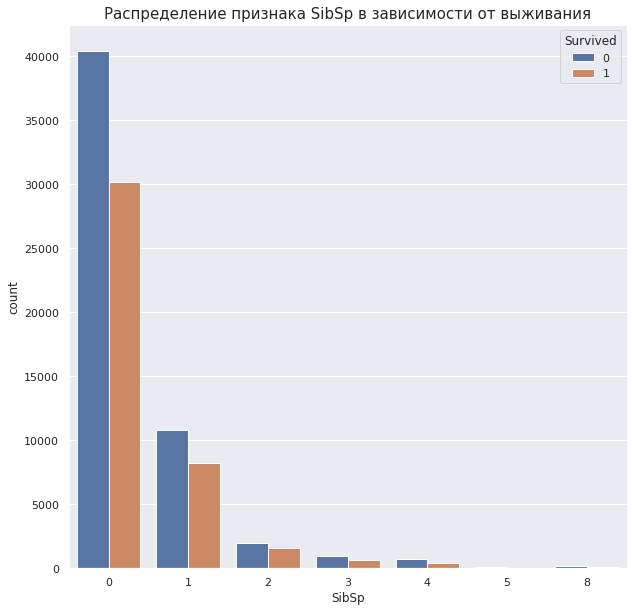

In [168]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="SibSp", hue="Survived", data=passengers_data);
plt.title("Распределение признака SibSp в зависимости от выживания", {"fontsize": 15});

Как видим, этот признак не сильно влияет на выживаемость пассажиров. Процент выживших не имеет какого-то определенного поведения с ростом признака SibSp

### Parch

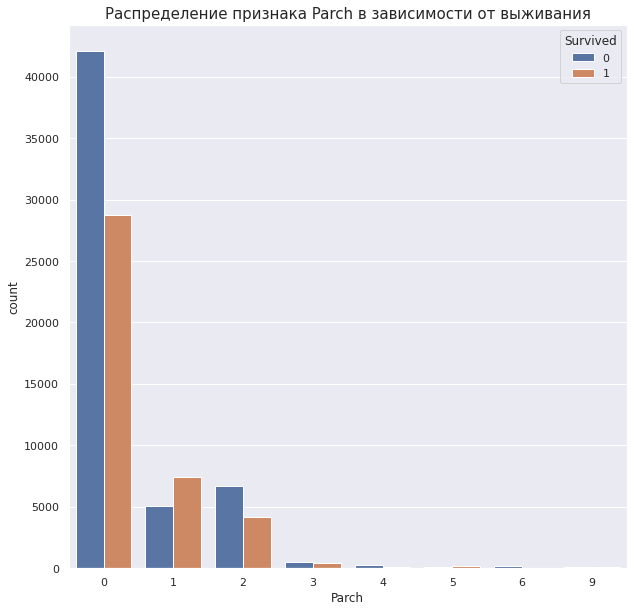

In [169]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Parch", hue="Survived", data=passengers_data);
plt.title("Распределение признака Parch в зависимости от выживания", {"fontsize": 15});

Видим большой процент выживших для значения 1.В остальных случаях ситуация сильно не меняется.

Возможно имеет место зависимость от признаков Parch и SibSp в совокупности с признаком Sex

### Fare

Для наглядности опять же рассмотрим пассажиров со значением признака Fare меньше 100, иначе картинка не информативна

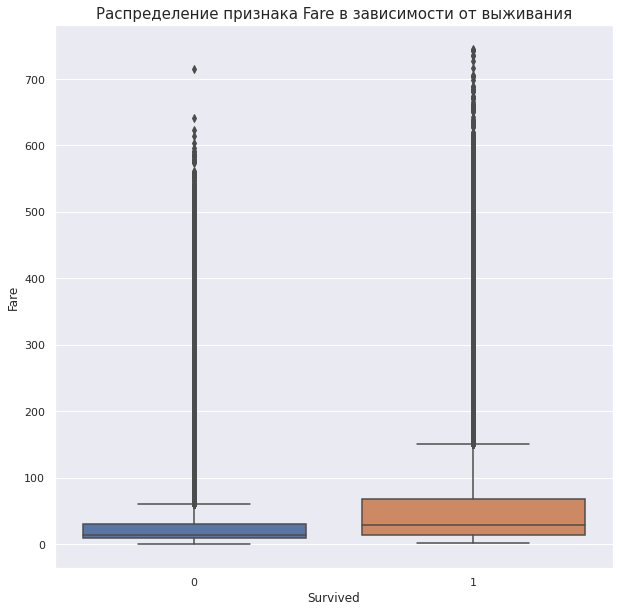

In [170]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="Survived", y="Fare", data=passengers_data);
plt.title("Распределение признака Fare в зависимости от выживания", {"fontsize": 15});

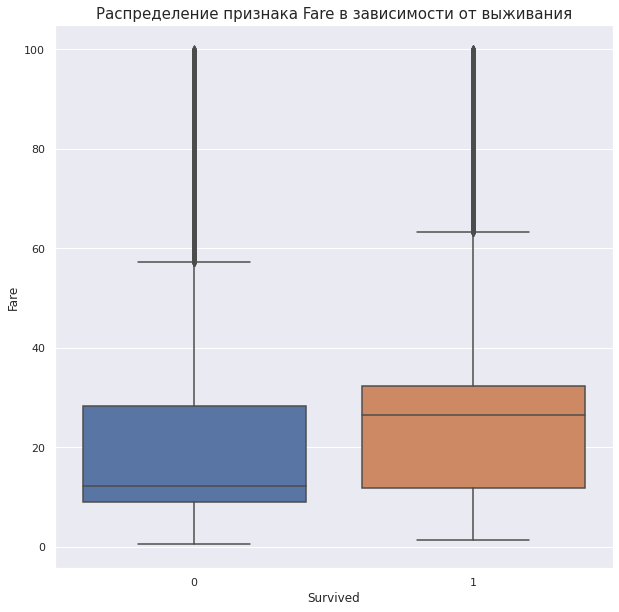

In [171]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="Survived", y="Fare", data=passengers_data[passengers_data["Fare"] < 100]);
plt.title("Распределение признака Fare в зависимости от выживания", {"fontsize": 15});

Четко видно, что среднее значение показателя Fare больше у выживших пассажиров. Опять же, это возможно связано с признаком Pclass и с выжимаемостью при каждом его значении

## Взаимодействие в совокупности

Теперь рассмотрим связь признаков между собой в совокупности

Первое, что приходит в голову, это рассмотреть матрицу корреляции

In [172]:
passengers_data.head()

,Survived,Pclass,Name,Surname,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,0,3,Owens,Kenneth,male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,Kramer,James,male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,Bond,Michael,male,25.00,0,0,427635,7.76,NaN,S
5,0,2,Sassano,Jonathan,male,35.00,0,0,13363,6.71,NaN,S
6,0,3,Conway,Jose,male,7.00,0,0,A/5,9.77,NaN,S


In [173]:
passengers_data_for_corr = passengers_data.copy()
passengers_data_for_corr.loc[:, "Sex"] = passengers_data_for_corr["Sex"].map({"male": 1, "female" : 0})
passengers_data_for_corr.loc[:, "Embarked"] = passengers_data_for_corr["Embarked"].map({"C": 1, "Q" : 2, "S": 3})

In [176]:
passengers_data_for_corr.head()

,Survived,Pclass,Name,Surname,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,0,3,Owens,Kenneth,1,0.33,1,2,CA 457703,71.29,NaN,3
3,0,3,Kramer,James,1,19.00,0,0,A. 10866,13.04,NaN,3
4,1,3,Bond,Michael,1,25.00,0,0,427635,7.76,NaN,3
5,0,2,Sassano,Jonathan,1,35.00,0,0,13363,6.71,NaN,3
6,0,3,Conway,Jose,1,7.00,0,0,A/5,9.77,NaN,3


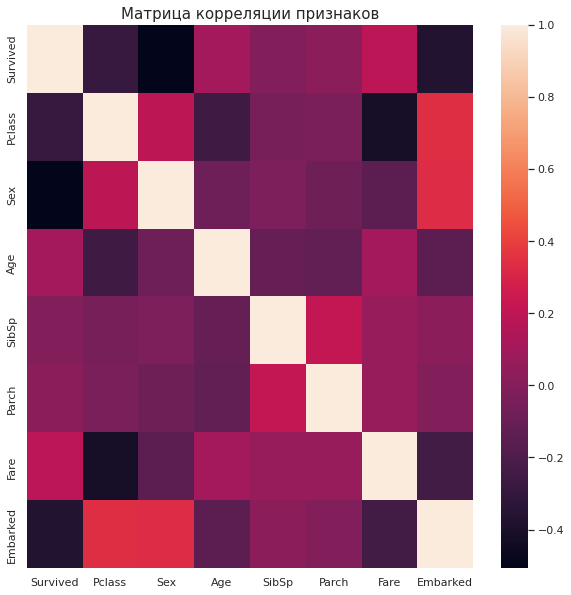

In [177]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(passengers_data_for_corr.corr());
plt.title("Матрица корреляции признаков", {"fontsize": 15});

Видим, что признак Pclass коррелирует с признаками Survived, Age, Fare, Embarked, что мы заметили ранее. Естественно это не говорит о наличии вежду ними зависмости, но наблюдения выше подтверждаются

Теперь давайте проверим некоторые предположения

### Fare и Embarked

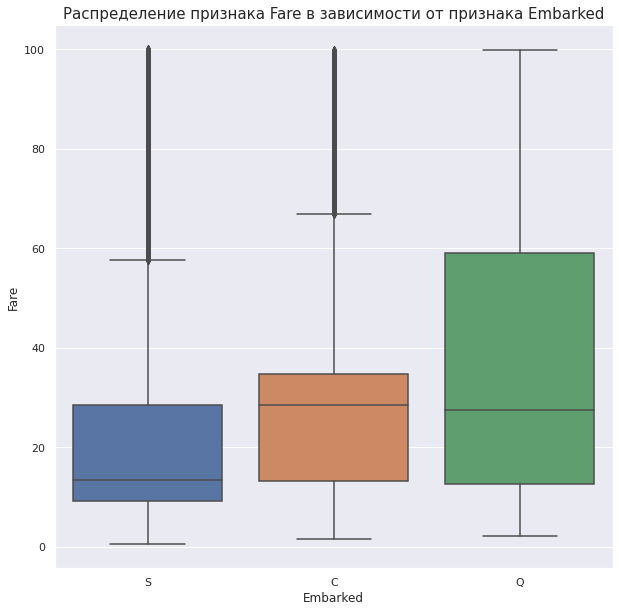

In [178]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="Embarked", y="Fare", data=passengers_data[passengers_data["Fare"] < 100]);
plt.title("Распределение признака Fare в зависимости от признака Embarked", {"fontsize": 15});

То есть значение в порту Southampton намного меньше остальных

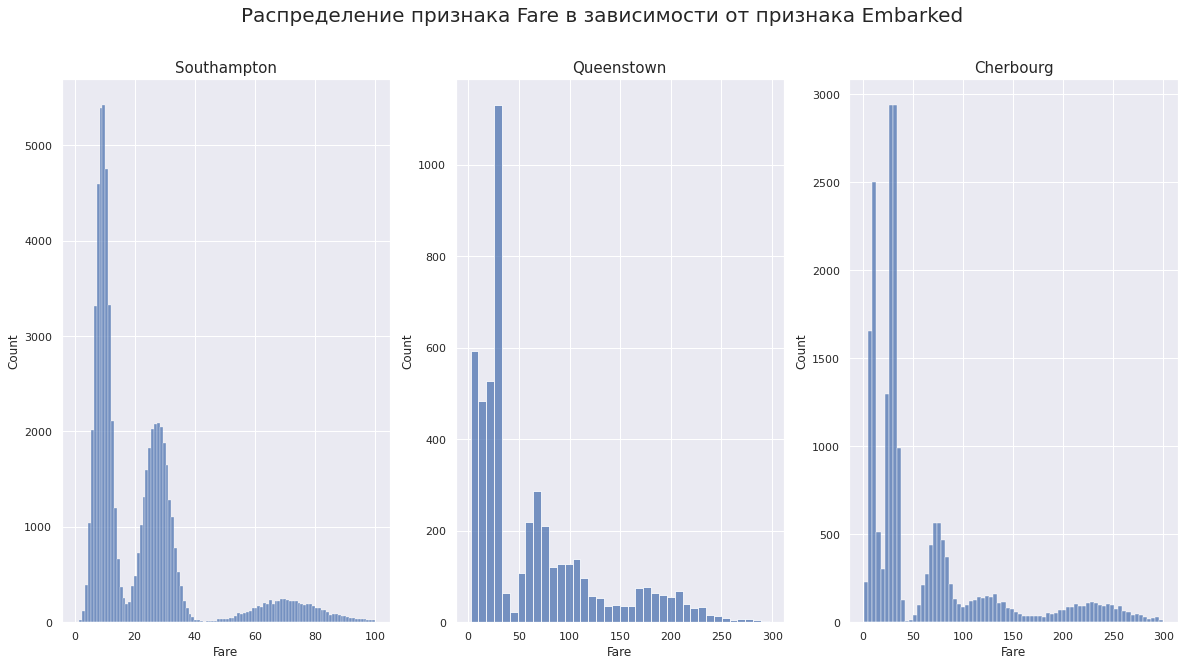

In [183]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Распределение признака Fare в зависимости от признака Embarked', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data[(passengers_data["Embarked"] == "S") & (passengers_data["Fare"] < 100)], x="Fare");
axes[0].set_title("Southampton",{"fontsize": 15});
sns.histplot(ax=axes[1], data=passengers_data[(passengers_data["Embarked"] == "Q") & (passengers_data["Fare"] < 300)], x="Fare");
axes[1].set_title("Queenstown",{"fontsize": 15});
sns.histplot(ax=axes[2], data=passengers_data[(passengers_data["Embarked"] == "C") & (passengers_data["Fare"] < 300)], x="Fare");
axes[2].set_title("Cherbourg",{"fontsize": 15});

Распределение поменялось не сильно и пики локализовать не удалось, так что наблюдение выше было интересным, но скорее всего не более чем наблюдением

### Pclass и Embarked

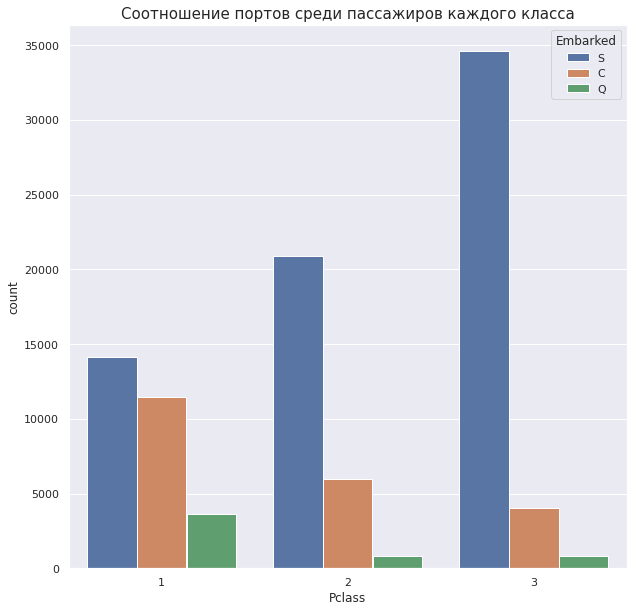

In [185]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Pclass", hue="Embarked", data=passengers_data);
plt.title("Соотношение портов среди пассажиров каждого класса", {"fontsize": 15});

Видим, что пассажиры третьего класса грузились преимущественно в порту Southampton

### Age и Pclass

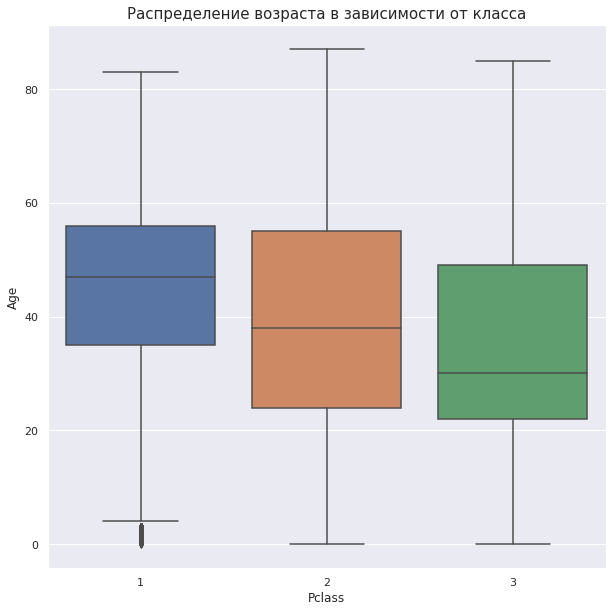

In [186]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="Pclass", y="Age", data=passengers_data);
plt.title("Распределение возраста в зависимости от класса", {"fontsize": 15});

А здесь наблюдается явная зависимость. Чем выше класс, тем старше пассажир

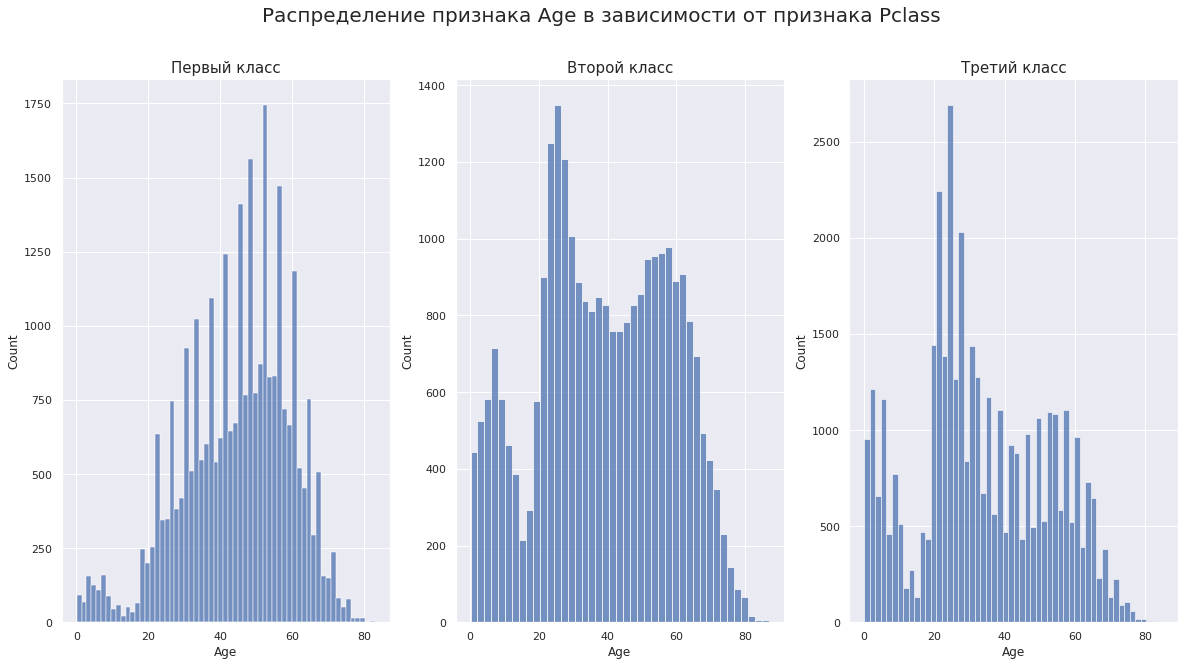

In [189]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Распределение признака Age в зависимости от признака Pclass', fontsize=20)

sns.histplot(ax=axes[0], data=passengers_data[passengers_data["Pclass"] == 1], x="Age");
axes[0].set_title("Первый класс",{"fontsize": 15});
sns.histplot(ax=axes[1], data=passengers_data[passengers_data["Pclass"] == 2], x="Age");
axes[1].set_title("Второй класс",{"fontsize": 15});
sns.histplot(ax=axes[2], data=passengers_data[passengers_data["Pclass"] == 3], x="Age");
axes[2].set_title("Третий класс",{"fontsize": 15});

### Survived от Parch и Sex

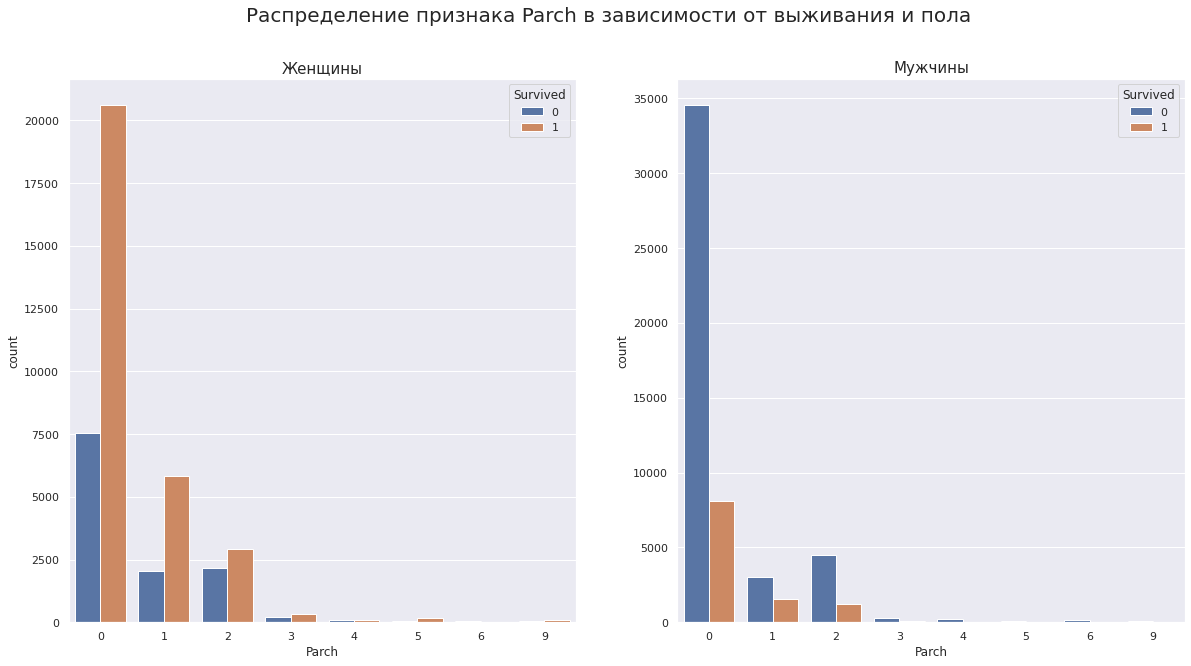

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Parch в зависимости от выживания и пола', fontsize=20)

sns.countplot(ax=axes[0], x="Parch", hue="Survived", data=passengers_data[passengers_data["Sex"] == 'female']);
axes[0].set_title("Женщины",{"fontsize": 15});
sns.countplot(ax=axes[1], x="Parch", hue="Survived", data=passengers_data[passengers_data["Sex"] == 'male']);
axes[1].set_title("Мужчины",{"fontsize": 15});

Отличная зависимость: Для женщины более опрделеюще наличие "родственников" для выживания, чем для мужчин

### Survived от SibSp и Sex

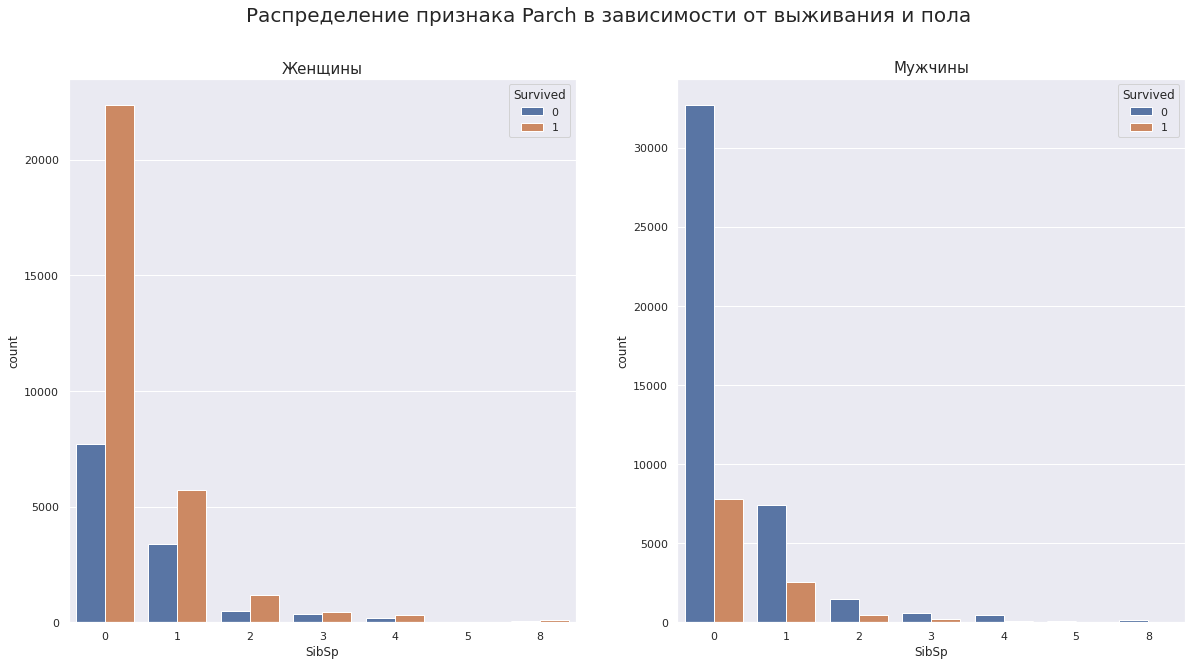

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Parch в зависимости от выживания и пола', fontsize=20)

sns.countplot(ax=axes[0], x="SibSp", hue="Survived", data=passengers_data[passengers_data["Sex"] == 'female']);
axes[0].set_title("Женщины",{"fontsize": 15});
sns.countplot(ax=axes[1], x="SibSp", hue="Survived", data=passengers_data[passengers_data["Sex"] == 'male']);
axes[1].set_title("Мужчины",{"fontsize": 15});

Такая же ситуация. Можно сказать, что для женщины выживаемость определяется тем, что она едет не одна

### Fare и Pclass

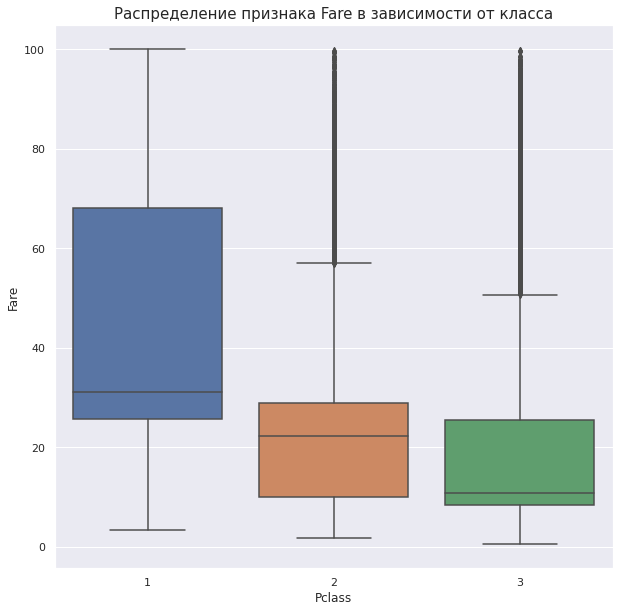

In [199]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="Pclass", y="Fare", data=passengers_data[passengers_data["Fare"] < 100]);
plt.title("Распределение признака Fare в зависимости от класса", {"fontsize": 15});

Тоже вполне очевидная зависимость. Чем выше класс билета, тем больше за него заплатили

## t-SNE

Попробуем найти двумерное представление наших данных

In [173]:
from sklearn.manifold import TSNE

In [174]:
tsne = TSNE(random_state=0)

Немного преобразуем наши данные для этого

In [193]:
categoric_features_without_target = ['Pclass', 'Sex', 'Embarked']

In [194]:
passengers_data_for_tsne = passengers_data[numeric_features + categoric_features_without_target]
passengers_data_for_tsne.loc[:, "Sex"] = passengers_data_for_tsne["Sex"].map({"male": 1, "female" : 0})
passengers_data_for_tsne.loc[:, "Embarked"] = passengers_data_for_tsne["Embarked"].map({"C": 1, "Q" : 2, "S": 3})

In [195]:
passengers_data_for_tsne.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
2,0.33,1,2,71.29,3,1,3
3,19.00,0,0,13.04,3,1,3
4,25.00,0,0,7.76,3,1,3
5,35.00,0,0,6.71,2,1,3
6,7.00,0,0,9.77,3,1,3


Теперь обучим t-SNE

In [196]:
tsne.fit(passengers_data_for_tsne)

/home/drapeykonik/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/drapeykonik/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE(random_state=0)

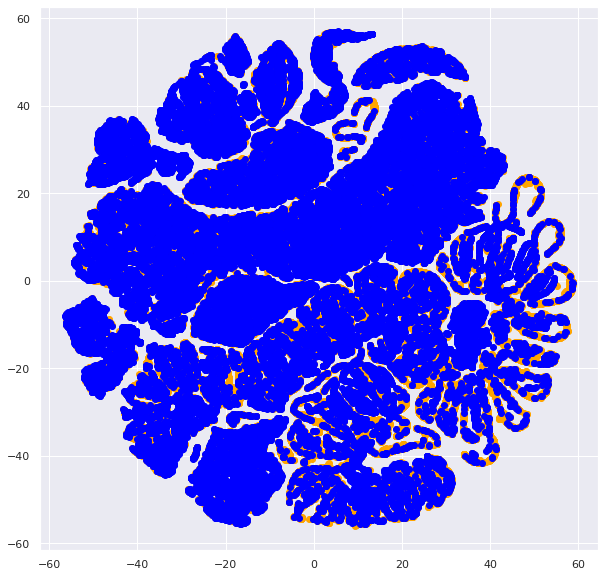

In [203]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(tsne.embedding_[passengers_data["Survived"] == 0][:, 0],
            tsne.embedding_[passengers_data["Survived"] == 0][:, 1],
            color="orange");
plt.scatter(tsne.embedding_[passengers_data["Survived"] == 1][:, 0],
            tsne.embedding_[passengers_data["Survived"] == 1][:, 1],
            color="blue");

Я ничего не ожидал от этого, просто было интересно. Но ,как видно, ничего не получилось и разделяемых множеств нет 

# Summary

Был проведен анализ датасета, а именно:
1. Содержание данных было проанализировано. Разобрались, какой признак за что отвечает. Выяснили размер данных и их качество. Также было проведено преобразование некоторых признаков для дальнейшей работы, а такде были отброшены строки с пропущенными значениями в важных признаках
2. Проведен анализ данных, изучен каждый признак по отдельности, в зависимости от целевого признака, а также между собой. Были выявлены "зависимости":
 - Признака Survived и Embarked (неявная)
 - Признака Age и Pclass
 - Признака Survived от Parch и Sex
 - Признака Survived от SibSp и Sex
 - Признака Fare и Pclass
 - Признака Survived и Pclass
Определяющим признаком для выживания во многом является признак Pclass, со многими он связан, но зависимость выживания от него явно есть
*Возможно, не все ключевые моменты указаны в этом пункте. Обращайте внимание на моменты по ходу ноутбука. Но если не заметите, я сам виноват)))*